In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
from getpass import getpass
from mysql.connector import connect, Error

try:
    with connect(
        host="127.0.0.1",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
    ) as connection:
     
        print(connection)
except Error as e:
    print(e)

Enter username: root
Enter password: ········


In [234]:
connection.reconnect();
cursor = connection.cursor();
cursor.execute("CREATE DATABASE Battles;")

In [235]:
connection.reconnect();
cursor = connection.cursor();
cursor.execute("USE Battles");

In [236]:
sql = "CREATE TABLE Location (location VARCHAR(50) NOT NULL , region VARCHAR(255) NOT NULL, Location_ID INT NOT NULL Primary Key);"
cursor.execute(sql);

In [237]:
sql = "DESCRIBE Location"
cursor.execute(sql);
result = cursor.fetchall()
print(result)

[('location', 'varchar(50)', 'NO', '', None, ''), ('region', 'varchar(255)', 'NO', '', None, ''), ('Location_ID', 'int', 'NO', 'PRI', None, '')]


In [238]:
sql = "CREATE TABLE Battles (name VARCHAR(50), year VARCHAR(25) NOT NULL, battle_number VARCHAR(250) PRIMARY KEY, battle_type varchar(25), major_death varchar(10), major_capture varchar(10), summer varchar(10), attacker_outcome varchar(10), Location_ID int, CONSTRAINT FK_Location_Location_ID FOREIGN KEY (Location_ID) REFERENCES Location(Location_ID));"
cursor.execute(sql)

In [243]:
sql = "CREATE TABLE defender (Defender_Number Varchar(100) NOT NULL PRIMARY KEY, defender_1 VARCHAR(100) NOT NULL, defender_king VARCHAR(25) NOT NULL, Battle_Number VARCHAR(250) NOT NULL, CONSTRAINT FK_defender_Battle_Number FOREIGN KEY (Battle_Number) REFERENCES Battles (battle_number), defender_size VARCHAR(25) NOT NULL);"
cursor.execute(sql);

In [248]:
sql = "DESCRIBE defender"
cursor.execute(sql);
result = cursor.fetchall()
print(result)

[('Defender_Number', 'varchar(100)', 'NO', 'PRI', None, ''), ('defender_1', 'varchar(100)', 'NO', '', None, ''), ('defender_king', 'varchar(25)', 'NO', '', None, ''), ('Battle_Number', 'varchar(250)', 'NO', 'MUL', None, ''), ('defender_size', 'varchar(25)', 'NO', '', None, '')]


In [259]:
sql = "CREATE TABLE attacker (Attacker_Number varchar(200) NOT NULL PRIMARY KEY, Battle_Number VARCHAR(250) NOT NULL, attacker_king VARCHAR(25) NOT NULL, attacker_size VARCHAR(25) NOT NULL,attacker_1 varchar(20), CONSTRAINT FK_attacker_battle_number FOREIGN KEY (battle_number) REFERENCES Battles (battle_number));"
cursor.execute(sql)

In [261]:
sql = "DESCRIBE attacker"
cursor.execute(sql);
result = cursor.fetchall()
print(result)

[('Attacker_Number', 'varchar(200)', 'NO', 'PRI', None, ''), ('Battle_Number', 'varchar(250)', 'NO', 'MUL', None, ''), ('attacker_king', 'varchar(25)', 'NO', '', None, ''), ('attacker_size', 'varchar(25)', 'NO', '', None, ''), ('attacker_1', 'varchar(20)', 'YES', '', None, '')]


In [192]:
sql = "DESCRIBE Battles"
cursor.execute(sql);
result = cursor.fetchall()
print(result)

[('name', 'varchar(50)', 'YES', '', None, ''), ('year', 'varchar(25)', 'NO', '', None, ''), ('battle_number', 'varchar(250)', 'NO', 'PRI', None, ''), ('battle_type', 'varchar(25)', 'YES', '', None, ''), ('major_death', 'tinyint(1)', 'YES', '', None, ''), ('major_capture', 'tinyint(1)', 'YES', '', None, ''), ('summer', 'tinyint(1)', 'YES', '', None, ''), ('attacker_outcome', 'varchar(10)', 'YES', '', None, ''), ('Location_ID', 'int', 'YES', 'MUL', None, '')]


In [239]:
Location = pd.read_csv('/Users/poojamanjunatha/Desktop/Location.csv', index_col=False)

In [229]:
Location.head()


,location,region,Location ID
0,Golden Tooth,The Westerlands,300
1,Mummer's Ford,The Riverlands,301
2,Riverrun,The Riverlands,302
3,Green Fork,The Riverlands,303
4,Whispering Wood,The Riverlands,304


In [240]:
for i, row in Location.iterrows():
    sql = "INSERT INTO Location VALUES (%s, %s, %s)"
    cursor.execute(sql, tuple(row))
    print("Record inserted")

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


In [255]:
attacker=pd.read_csv('/Users/poojamanjunatha/Desktop/attacker.csv', index_col=False)

In [263]:
for i, row in attacker.iterrows():
    sql = "INSERT INTO attacker VALUES (%s, %s, %s,%s,%s)"
    cursor.execute(sql, tuple(row))
    print("Record inserted")

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


In [242]:
for i, row in Battles.iterrows():
    sql = "INSERT INTO  BATTLES VALUES (%s, %s, %s,%s,%s,%s,%s,%s,%s)"
    cursor.execute(sql, tuple(row))
    print("Record inserted")

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


In [249]:
defender=pd.read_csv('/Users/poojamanjunatha/Desktop/defender.csv', index_col=False)

In [250]:
defender.head()

,Defender_Number,defender_1,defender_king,battle_number,defender_size
0,200,Tully,Robb Stark,1,4000
1,201,Baratheon,Robb Stark,2,120
2,202,Tully,Robb Stark,3,10000
3,203,Lannister,Joffrey,4,20000
4,204,Lannister,Joffrey,5,6000


In [241]:
Battles=pd.read_csv('/Users/poojamanjunatha/Desktop/Battles.csv', index_col=False)

In [251]:
for i, row in defender.iterrows():
    sql = "INSERT INTO  defender VALUES (%s, %s, %s,%s,%s)"
    cursor.execute(sql, tuple(row))
    print("Record inserted")

Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted
Record inserted


In [204]:
Battles.head()

,name,year,battle_number,battle_type,major_death,major_capture,summer,attacker_outcome,Location ID
0,Battle of the Golden Tooth,298,1,pitched battle,1,0,1,win,300
1,Battle at the Mummer's Ford,298,2,ambush,1,0,1,win,301
2,Battle of Riverrun,298,3,pitched battle,0,1,1,win,302
3,Battle of the Green Fork,298,4,pitched battle,1,1,1,loss,303
4,Battle of the Whispering Wood,298,5,ambush,1,1,1,win,304


In [262]:
sql = "DESCRIBE attacker"
cursor.execute(sql);
result = cursor.fetchall()
print(result)

[('Attacker_Number', 'varchar(200)', 'NO', 'PRI', None, ''), ('Battle_Number', 'varchar(250)', 'NO', 'MUL', None, ''), ('attacker_king', 'varchar(25)', 'NO', '', None, ''), ('attacker_size', 'varchar(25)', 'NO', '', None, ''), ('attacker_1', 'varchar(20)', 'YES', '', None, '')]


In [264]:
for i, row in attacker.iterrows():
    sql = "INSERT INTO  attacker VALUES (%s, %s, %s,%s,%s)"
    cursor.execute(sql, tuple(row))
    print("Record inserted") 
###already inserted value so there is an error

IntegrityError: 1062 (23000): Duplicate entry '100' for key 'attacker.PRIMARY'

In [267]:
connection.commit()

In [269]:
sql = "SELECT * FROM attacker;"
cursor.execute(sql);
result = cursor.fetchall()
print(len(result));
connection.commit();

10


In [270]:
##selecting all columns from attacker table where one of the attacker is a Lannister
sql = "SELECT * FROM attacker WHERE attacker_1 = 'Lannister';"
cursor.execute(sql);
result = cursor.fetchall()
print("Details of the attack where one of the atackers is named Lannister:", result);

Details of the attack where one of the atackers is named Lannister: [('100', '1', 'Joffrey Baratheon', '15000', 'Lannister'), ('101', '2', 'Joffrey Baratheon', '15000', 'Lannister'), ('102', '3', 'Joffrey  Baratheon', '15000', 'Lannister'), ('106', '7', 'Joffrey Baratheon', '8000', 'Lannister')]


In [276]:
##Inserting a value into the Location table
sql = "INSERT INTO Location (location,region,Location_ID) VALUES ('The_North', 'Winterfell','555');"
cursor.execute(sql);

In [277]:
##Updating the value
sql = "UPDATE Location SET region = 'White Harbor' WHERE Location_ID = '555'";
cursor.execute(sql);
sql = "SELECT * FROM Location WHERE Location_ID = '555';"
cursor.execute(sql);
result = cursor.fetchall()
print("Updating the name of the region correctly which was inserted incorrectly previously :", result);

Updating the name of the region correctly which was inserted incorrectly previously : [('The_North', 'White Harbor', 555)]


In [278]:
##Deleting the value
sql = "DELETE FROM Location WHERE Location_ID = '555';"
cursor.execute(sql);
sql = "SELECT * FROM location WHERE Location_ID = '555';"
cursor.execute(sql);
result = cursor.fetchall()
print("Deleting a location with the location ID 555 which was inserted above ", result);

Deleting a location with the location ID 555 which was inserted above  []


In [364]:
##Inserting the value to the Battles table
sql="INSERT INTO Battles(name,year,battle_number,battle_type,major_death,major_capture,summer,attacker_outcome,Location_ID) VALUES('Battle_of_Bastards','202','1000','Ambush','1','0','0','win','315')"
cursor.execute(sql);

In [365]:
##Updating the value in the Battles table that is previously added
sql = "UPDATE Battles SET year = '2014' WHERE  Location_ID = '315'";
cursor.execute(sql);
sql = "SELECT * FROM Battles WHERE Location_ID = '315';"
cursor.execute(sql);
result = cursor.fetchall()
print("Updating the name of the year correctly which was inserted incorrectly previously :", result);

Updating the name of the year correctly which was inserted incorrectly previously : [{'name': 'Battle_of_Bastards', 'year': '2014', 'battle_number': '1000', 'battle_type': 'Ambush', 'major_death': '1', 'major_capture': '0', 'summer': '0', 'attacker_outcome': 'win', 'Location_ID': 315}]


In [366]:
##Deleting the previous record
sql="DELETE from battles where Location_ID='315'"
cursor.execute(sql);
sql = "SELECT * FROM Battles WHERE Location_ID = '315';"
cursor.execute(sql);
result = cursor.fetchall()
print("Deleting a battle with the location ID 315 which was inserted above ", result);


Deleting a battle with the location ID 315 which was inserted above  []


This analysis shows the name of the battle and type of battle that is won
{'name': 'Battle of the Golden Tooth', 'battle_type': 'pitched battle'}
{'name': 'Battle of the Stony Shore', 'battle_type': 'ambush'}
{'name': "Battle at the Mummer's Ford", 'battle_type': 'ambush'}
{'name': 'Battle of Riverrun', 'battle_type': 'pitched battle'}
{'name': 'Battle of the Whispering Wood', 'battle_type': 'ambush'}
{'name': 'Battle of the Camps', 'battle_type': 'ambush'}
{'name': 'Sack of Darry', 'battle_type': 'pitched battle'}
{'name': 'Battle of Moat Cailin', 'battle_type': 'pitched battle'}
{'name': 'Battle of Deepwood Motte', 'battle_type': 'siege'}


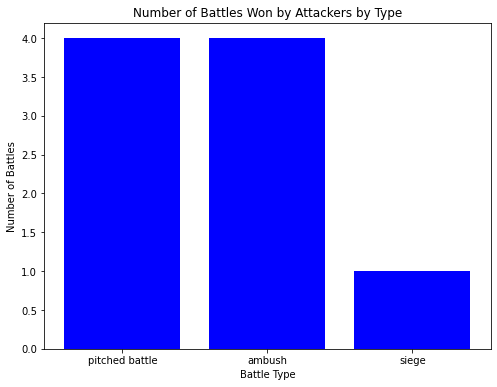

In [349]:
print("This analysis shows the name of the battle and type of battle that is won");
cursor = connection.cursor(dictionary=True)
sql = "SELECT B.name,B.battle_type from Battles B inner join attacker A on A.battle_number=B.battle_number where B.attacker_outcome= 'win'"
cursor.execute(sql)
result = cursor.fetchall()
if len(result) == 0:
  print("No rows found")
else:
  for row in result:
    print(row)
df = pd.read_sql_query(sql, connection)
battle_counts = df['battle_type'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(battle_counts.index, battle_counts.values, color='blue')
plt.xlabel('Battle Type')
plt.ylabel('Number of Battles')
plt.title('Number of Battles Won by Attackers by Type')
plt.show()





In [350]:
print("This bar chart shows that most of the battles won are of the type pitched_battle which is a planned battle followedby ambush where the attacker surprises the other group and the least is by siege where one group forces the other one  to surrender");


This bar chart shows that most of the battles won are of the type pitched_battle which is a planned battle followedby ambush where the attacker surprises the other group and the least is by siege where one group forces the other one  to surrender


In [358]:
print("This analysis would calculate the sum of attacker sizes for each battle that is won and provide a measure of the total attacker strength for each battle.");
cursor=connection.cursor(dictionary=True)
sql="SELECT battles.battle_number, SUM(attacker.attacker_size) AS total_strength FROM battles INNER JOIN attacker ON battles.battle_number = attacker.battle_number where battles.attacker_outcome='win' GROUP BY battles.battle_number"
cursor.execute(sql)
result = cursor.fetchall()
if len(result) == 0:
  print("No rows found")
else:
  for row in result:
    print(row)


This analysis would calculate the sum of attacker sizes for each battle that is won and provide a measure of the total attacker strength for each battle.
{'battle_number': '1', 'total_strength': 15000.0}
{'battle_number': '10', 'total_strength': 264.0}
{'battle_number': '2', 'total_strength': 15000.0}
{'battle_number': '3', 'total_strength': 15000.0}
{'battle_number': '5', 'total_strength': 1875.0}
{'battle_number': '6', 'total_strength': 6000.0}
{'battle_number': '7', 'total_strength': 8000.0}
{'battle_number': '8', 'total_strength': 9000.0}
{'battle_number': '9', 'total_strength': 1000.0}


This pie chart shows the total battle_strength of each battle and there is a tie between battle 1 and battle 3, the lowest is that of battle 10


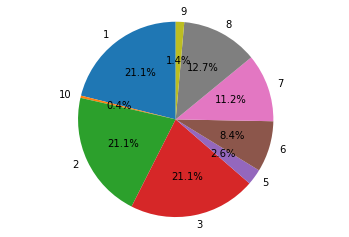

In [360]:
print('This pie chart shows the total battle_strength of each battle and there is a tie between battle 1 and battle 3, the lowest is that of battle 10');
labels = [row['battle_number'] for row in result]
values = [row['total_strength'] for row in result]
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

This analysis would provide the number of unique attackers for each battle in the combined table.
{'battle_number': '1', 'name_attackers': 1}
{'battle_number': '10', 'name_attackers': 1}
{'battle_number': '2', 'name_attackers': 1}
{'battle_number': '3', 'name_attackers': 1}
{'battle_number': '4', 'name_attackers': 1}
{'battle_number': '5', 'name_attackers': 1}
{'battle_number': '6', 'name_attackers': 1}
{'battle_number': '7', 'name_attackers': 1}
{'battle_number': '8', 'name_attackers': 1}
{'battle_number': '9', 'name_attackers': 1}


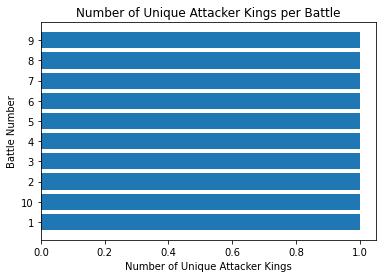

Every battle has a unique attacker


In [356]:

print("This analysis would provide the number of unique attackers for each battle in the combined table.")
sql = "SELECT battles.battle_number, COUNT(DISTINCT attacker.attacker_king) AS name_attackers FROM battles INNER JOIN attacker ON battles.battle_number = attacker.battle_number GROUP BY battles.battle_number";
cursor.execute(sql)

result = cursor.fetchall()

if len(result) == 0:
  print("No rows found")
else:
  for row in result:
    print(row)
df = pd.DataFrame(result, columns=['battle_number', 'name_attackers'])
plt.barh(df['battle_number'], df['name_attackers'])
plt.xlabel('Number of Unique Attacker Kings')
plt.ylabel('Battle Number')
plt.title('Number of Unique Attacker Kings per Battle')
plt.show()
print('Every battle has a unique attacker')

In [352]:

print("This analysis shows difference in the sizes of the army between attackers and defenders ")
sql="SELECT Battles.name, SUM(attacker_size) AS attacker_size, SUM(defender_size) AS defender_size, SUM(attacker_size) -SUM(defender_size) AS total_size FROM Battles LEFT JOIN attacker ON Battles.battle_number = attacker.battle_number LEFT JOIN defender ON Battles.battle_number = defender.battle_number GROUP BY Battles.name ORDER BY total_size DESC;"
cursor.execute(sql)

result = cursor.fetchall()

if len(result) == 0:
  print("No rows found")
else:
  for row in result:
    print(row)

This analysis shows difference in the sizes of the army between attackers and defenders 
{'name': "Battle at the Mummer's Ford", 'attacker_size': 15000.0, 'defender_size': 120.0, 'total_size': 14880.0}
{'name': 'Battle of the Golden Tooth', 'attacker_size': 15000.0, 'defender_size': 4000.0, 'total_size': 11000.0}
{'name': 'Battle of Moat Cailin', 'attacker_size': 9000.0, 'defender_size': 600.0, 'total_size': 8400.0}
{'name': 'Battle of Riverrun', 'attacker_size': 15000.0, 'defender_size': 10000.0, 'total_size': 5000.0}
{'name': 'Sack of Darry', 'attacker_size': 8000.0, 'defender_size': 7000.0, 'total_size': 1000.0}
{'name': 'Battle of Deepwood Motte', 'attacker_size': 1000.0, 'defender_size': 550.0, 'total_size': 450.0}
{'name': 'Battle of the Stony Shore', 'attacker_size': 264.0, 'defender_size': 950.0, 'total_size': -686.0}
{'name': 'Battle of the Green Fork', 'attacker_size': 18000.0, 'defender_size': 20000.0, 'total_size': -2000.0}
{'name': 'Battle of the Whispering Wood', 'attacke

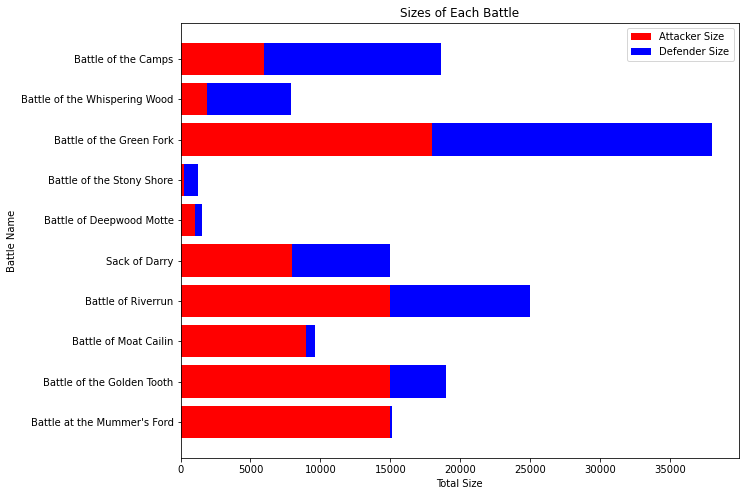

The size of the attacker is greater than that of the defender significantly in most of the cases


In [354]:
df = pd.read_sql_query(sql, connection)
plt.figure(figsize=(10, 8))
plt.barh(df['name'], df['attacker_size'], color='red', label='Attacker Size')
plt.barh(df['name'], df['defender_size'], left=df['attacker_size'], color='blue', label='Defender Size')
plt.xlabel('Total Size')
plt.ylabel('Battle Name')
plt.title('Sizes of Each Battle')
plt.legend()
plt.show()
print("The size of the attacker is greater than that of the defender significantly in most of the cases")

In [345]:
print("This analysis shows the Location with the highest number of battles ")
sql="SELECT location.location, COUNT(*) AS num_battles FROM Battles INNER JOIN location ON Battles.Location_ID = Location.Location_ID GROUP BY location.location ORDER BY num_battles DESC LIMIT 1;"

cursor.execute(sql)

result = cursor.fetchall()

if len(result) == 0:
  print("No rows found")
else:
  for row in result:
    print(row)

Location with the highest number of battles 
{'location': 'Riverrun', 'num_battles': 2}


In [357]:
print("The highest number of battles fought is in Riverrun which suggests that Riverrun is an important location to the kingdoms");

The highest number of battles fought is in Riverrun which suggests that Riverrun is an important location to the kingdoms
